# Frequency Responses of Transfer Function Components

In [2]:
import numpy as np
import control
import matplotlib.pyplot as plt # plotting library

Using logarithms allows multiplicative factors in a transfer function to be converted to additive factors.

$\log(ab)=\log(a)+\log(b)$

$\log\left(\frac{c}{d}\right)=\log(c)-\log(d)$

So, we can look at the transfer function of something like:

$$G(s)=\frac{K_b(\tau_1 s +1)(s^2+2\zeta_1\omega_{n_1}s + \omega_{n_1}^2)}{s(\tau_2 s+1)(s^2+2\zeta_2\omega_{n_2}s + \omega_{n_2}^2)}$$

And evaluate separate bode plots for:

* Constant gain $K_b$
* Poles (or zeros) at the origin $s$
* Poles (or zeros) on the real axis $(\tau s + 1)$
* Complex conjugate poles (or zeros) $(s^2 + 2\zeta \omega_n s + \omega_n^2)$

Then add the contributions from the different factors together to generate the total bode plot for the system.

## Bode plot of a constant gain

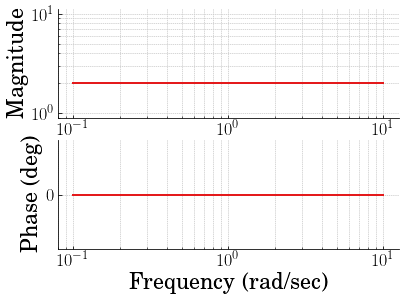

In [3]:
Kb = 2

num=[Kb]
den=[1]
sys=control.tf(num,den)
_ = control.bode_plot(sys, dB=False, omega=None, plot=True, omega_limits=None, omega_num=None)
# The underscore means we don't care about assigning the output of `control.bode_plot` to a variable

## Bode plot for pole or zero at the origin
### Pole at the origin

The magnitude of the frequency response for a pole at the origin is a straight line on a log-log scale. The phase will be constant at $-90$ degrees.

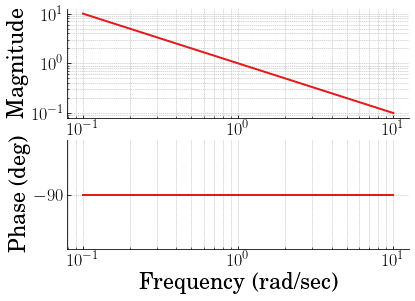

In [4]:
num=[1]
den=[1,0]
sys=control.tf(num,den)
_ = control.bode_plot(sys, dB=False, omega=None, plot=True, omega_limits=None, omega_num=None)

### Zero at the origin
Similar to a pole at the origin except the magnitude will have a positive slope and phase will be positive $90$ degrees.

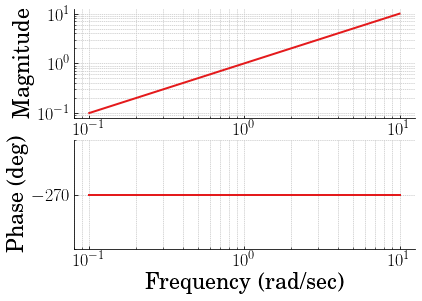

In [5]:
num=[1,0]
den=[1]
sys=control.tf(num,den)
_ = control.bode_plot(sys, dB=False, omega=None, plot=True, omega_limits=None, omega_num=None)

## Bode plot for poles and zeros on the real axis
### Pole on real axis

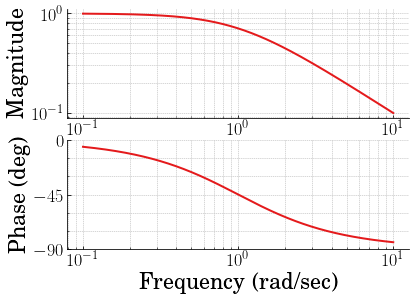

In [19]:
tau = 1

num=[1]
den=[tau, 1]
sys=control.tf(num,den)
_ = control.bode_plot(sys, dB=False, omega=None, plot=True, omega_limits=None, omega_num=None)

### Zero on real axis

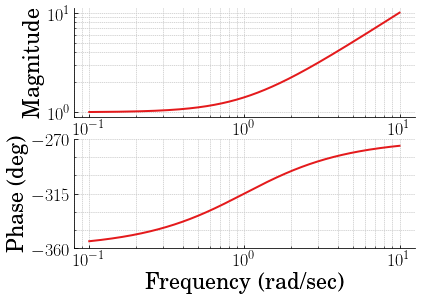

In [8]:
tau = 1

num=[tau, 1]
den=[1]
sys=control.tf(num,den)
_ = control.bode_plot(sys, dB=False, omega=None, plot=True, omega_limits=None, omega_num=None)

## Bode plots of complex conjugate poles and zeros
### Complex poles

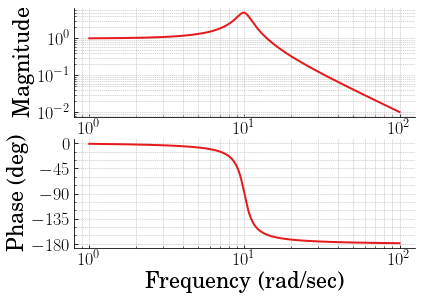

In [14]:
wn=10
zeta=0.1

num=[wn**2] # use wn**2 in numerator to ensure bode plot starts at magnitude of 1 (this doesn't change the shape of bode plot)
den=[1, 2*zeta*wn,wn**2]
sys=control.tf(num,den)
_ = control.bode_plot(sys, dB=False, omega=None, plot=True, omega_limits=None, omega_num=None)

### Complex zeros

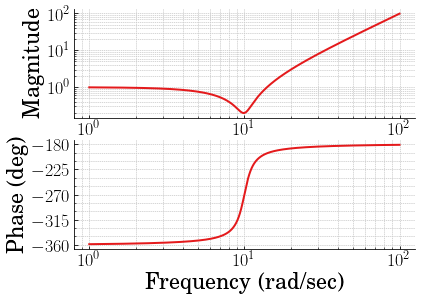

In [15]:
wn=10
zeta=0.1

num=[1, 2*zeta*wn,wn**2]
den=[wn**2] # use wn**2 in denominator to ensure bode plot starts at magnitude of 1 (this doesn't change the shape of bode plot)
sys=control.tf(num,den)
_ = control.bode_plot(sys, dB=False, omega=None, plot=True, omega_limits=None, omega_num=None)

## Example 8.5
The example in the book is about plotting approximations of bode plots by hand. We're going to just get python to do it. The transfer function for the system is:

$$G(s)=\frac{K(\tau_1s+1)\omega_n^2}{s(\tau_2s+1)(s^2+2\zeta\omega_ns+\omega_n^2)}$$

where $K=5$, $\tau_1=0.1$, $\tau_2=0.5$, $\zeta=0.3$, and $w_n=50$.

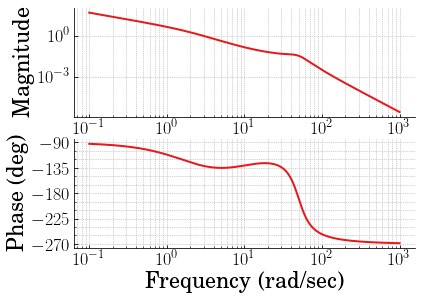

In [24]:
K=5
tau1=0.1
tau2=0.5
zeta=0.3
wn=50

s=control.TransferFunction.s

G = (K*(tau1*s+1)*wn**2)/(s*(tau2*s+1)*(s**2+2*zeta*wn*s+wn**2))

_ = control.bode_plot(G, dB=False, omega=None, plot=True, omega_limits=None, omega_num=None)